<a href="https://colab.research.google.com/github/EduHdzVillasana/Proyecto_ML_BEDU/blob/main/Proyecto_ML_BEDU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto BEDU Machine Learning
**Integrantes**
* Eduardo Alán Hernández Villasana
* Cristopher Arvizu Cano
* José Antonio Aguilar Téllez

## Librerias a utilizar

In [ ]:
# Importamos la librerias a utilzar
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
import os

warnings.simplefilter(action='ignore', category=FutureWarning)

### Carga del Dataset

#### Importante (Antes de correr el Notebook)

Si gustas correr todo el notebook, te compartimos el link donde alojamos los datos de crimenes de Chicago. Antes de correrlo te rrecomendamos elegir el directorio donde alojes los datos que te compartimos en nuestro caso decidimos utilizar  **'/content/drive/MyDrive/', esperamos que esta información te sea util y te permite navegar de una mejor manera dentro de este notebook. Como ultima recomendación debo avisarte que la base de datos tiene un size de 7,000,000 aproximadamente.

link DataSet:

https://drive.google.com/drive/folders/1D_zLbpVue7U8WzSGy7DRSqDXr7KQYMbY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leemos la base de datos
df = pd.read_csv('/content/drive/MyDrive/Datos Análisis del Crimen en Chicago/Crimes_2001-2021_clean.csv', index_col=0, )
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BEDU/Datos Análisis del Crimen en Chicago/Crimes_2001-2021_clean.csv', index_col=0, )

In [ ]:
#Descripción de cada uno de los datos presentes en la base de datos
df_desc = pd.read_csv('https://raw.githubusercontent.com/EduHdzVillasana/Analisis_Crimen_Chicago_BEDU/main/documentacion_Crimenes.csv', sep=',', encoding='latin1')
df_desc.style.set_properties(subset=['Description'], **{'width': '300px'})

### Limpieza de datos y casting de fechas

In [ ]:
df.head()

ID Case Number  ...  Longitude                       Location
0  10224738    HY411648  ... -87.670000  (41.815117282, -87.669999562)
1  10224739    HY411615  ... -87.765400  (41.895080471, -87.765400451)
3  10224740    HY411595  ... -87.716650  (41.937405765, -87.716649687)
4  10224741    HY411610  ... -87.755121  (41.881903443, -87.755121152)
5  10224742    HY411435  ... -87.658431  (41.744378879, -87.658430635)

[5 rows x 22 columns]

In [ ]:
# No existen los Distritos policiales 21 y 31. 

df = df[df["District"] != 21.0]
df = df[df["District"] != 31.0]

In [ ]:
# Algunos delitos registrados salen del área de Chicago

df= df[df["Latitude"] > 41]

In [ ]:
# Casting de datos booleanos
df['Arrest'] = df['Arrest'].apply(lambda x: 1 if x == True else 0)
df['Domestic'] = df['Domestic'].apply(lambda x: 1 if x == True else 0)

In [ ]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Datos de chicago

In [ ]:
df

ID Case Number  ...  Longitude                       Location
0        10224738    HY411648  ... -87.670000  (41.815117282, -87.669999562)
1        10224739    HY411615  ... -87.765400  (41.895080471, -87.765400451)
3        10224740    HY411595  ... -87.716650  (41.937405765, -87.716649687)
4        10224741    HY411610  ... -87.755121  (41.881903443, -87.755121152)
5        10224742    HY411435  ... -87.658431  (41.744378879, -87.658430635)
...           ...         ...  ...        ...                            ...
7312660  12342691    JE202185  ... -87.714169  (41.893649369, -87.714169216)
7312662  12345065    JE205024  ... -87.643199  (41.903113054, -87.643199348)
7312663  12343178    JE202843  ... -87.659535  (41.855180292, -87.659535464)
7312664  12342712    JE202375  ... -87.596069  (41.725018749, -87.596068775)
7312665  12342400    JE201989  ... -87.680255  (41.702149157, -87.680254524)

[6628274 rows x 22 columns]

# Arena de Regresores

En esta seccion se probaron tres modelos para predecir los futuros crimenes en Chicago mediante series de tiempo:

* Regresión lineal
* LSTM (Red neuronal de memoria a corto plazo a largo plazo)
* Fbprophet
* Sarimax

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_url = "https://raw.githubusercontent.com/EduHdzVillasana/Proyecto_ML_BEDU/main/crime_time_series.csv"

In [ ]:
ts_crime = pd.read_csv(file_url).drop(columns = ["Unnamed: 0"])
ts_crime = ts_crime[:-1]
ts_crime.head(10)

Date  Total_Crimes
0  2002-04-25          1294
1  2002-04-26          1367
2  2002-04-27          1254
3  2002-04-28          1119
4  2002-04-29          1447
5  2002-04-30          1322
6  2002-05-01          1450
7  2002-05-02          1244
8  2002-05-03          1296
9  2002-05-04          1283

In [ ]:
ts_crime['Date'] = pd.to_datetime(ts_crime.Date)

In [ ]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

## Regresión Lineal

### Instancia 1:
**Parámetros**
* Elementos por muestra : 7

In [ ]:
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = 7)

In [ ]:
print(X.shape)
print(Y.shape)

(6925, 7)
(6925,)


In [ ]:
Y[:10]

array([1244, 1296, 1283, 1254, 1234, 1278, 1372, 1366, 1492, 1235])

In [ ]:
n = 7
start = n
end = ts_crime.shape[0] - 2
(start, end)

(7, 6931)

In [ ]:
ts_crime[7:6933]

Date  Total_Crimes
7    2002-05-02          1244
8    2002-05-03          1296
9    2002-05-04          1283
10   2002-05-05          1254
11   2002-05-06          1234
...         ...           ...
6928 2021-04-13           481
6929 2021-04-14           434
6930 2021-04-15           443
6931 2021-04-16           458
6932 2021-04-17           474

[6926 rows x 2 columns]

In [ ]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4847, 7)
(2078, 7)
(4847,)
(2078,)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
def get_metrics (real, prediction):
  MSE = (mean_squared_error(real, prediction))
  print("MSE = "+str(MSE))

  r2 = (r2_score(real, prediction))
  print("r^2 = "+str(r2))

In [ ]:
Y_predicted = lin_model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][7:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6925, 3)

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

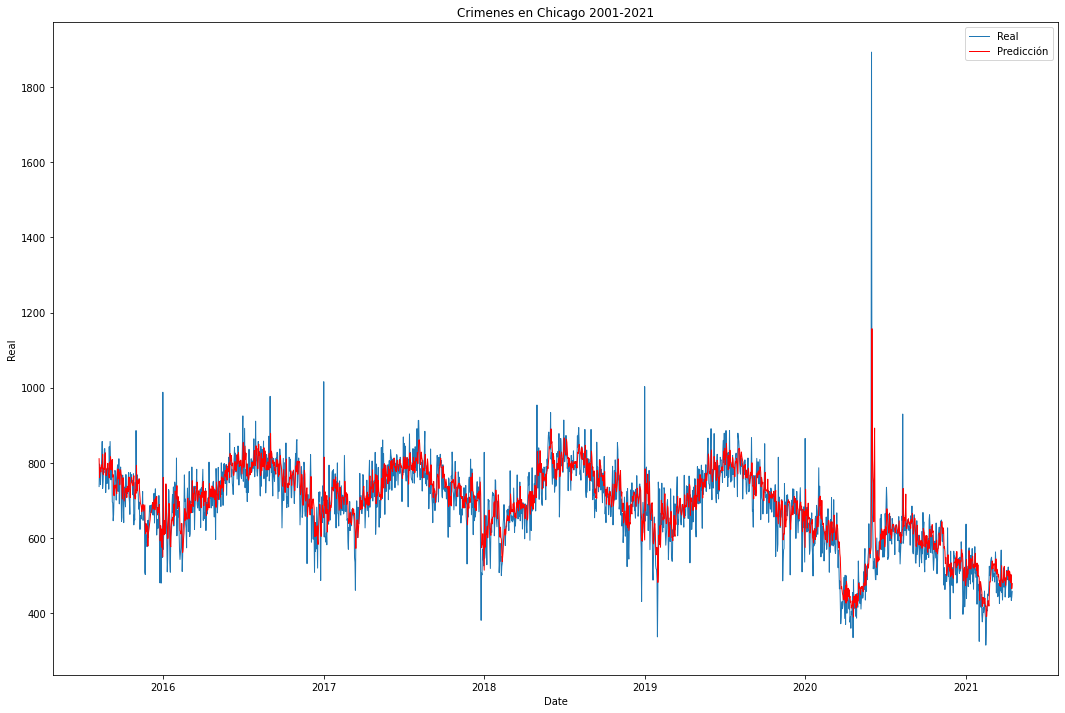

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):], y=df_comparation["Real"][int(X.shape[0]*0.7):], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):],y=df_comparation["Prediccion"][int(X.shape[0]*0.7):], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [ ]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 6905.051132351429
r^2 = 0.9049237402066969


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

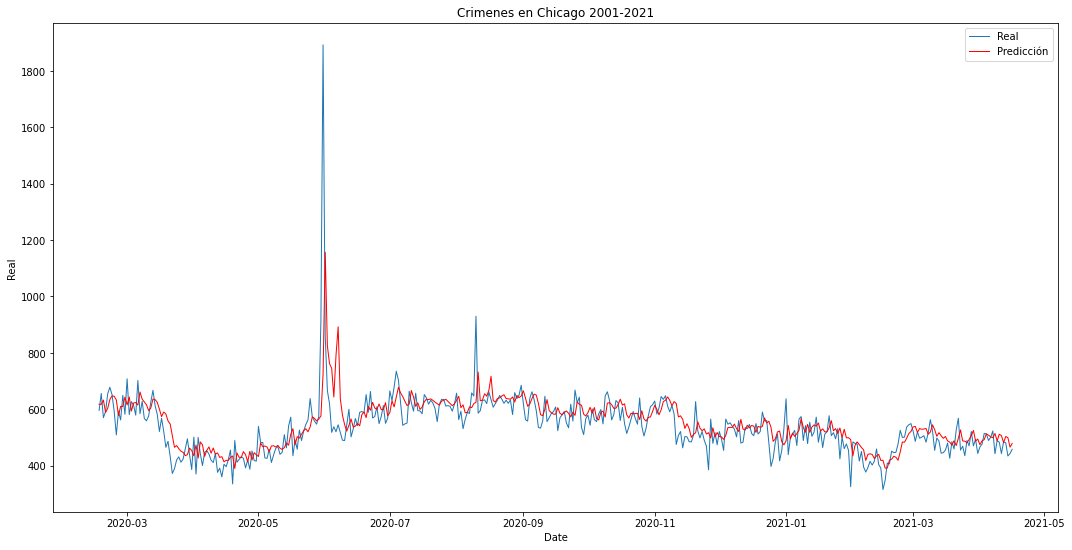

In [ ]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][6500:], y=df_comparation["Real"][6500:], linewidth = 1, label = "Real" , ax = ax)
sns.lineplot(x=df_comparation["Date"][6500:],y=df_comparation["Prediccion"][6500:], linewidth = 1, label = "Predicción" , ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [ ]:
index = int(X.shape[0]*0.7)
X_f = X[index:index+1]
X_f

array([[806, 722, 745, 753, 793, 815, 837]])

In [ ]:
y_lm_7_prediction = lin_model.predict(X_test)
y_lm_7_prediction.shape, X_test.shape

((2078,), (2078, 7))

In [ ]:
get_metrics(y_lm_7_prediction, Y_test)

MSE = 4148.874877849269
r^2 = 0.5635582379808834


In [ ]:
ts_crime[int(X.shape[0]*0.7)+7:-1]

Date  Total_Crimes
4854 2015-08-09           737
4855 2015-08-10           797
4856 2015-08-11           778
4857 2015-08-12           742
4858 2015-08-13           769
...         ...           ...
6927 2021-04-12           484
6928 2021-04-13           481
6929 2021-04-14           434
6930 2021-04-15           443
6931 2021-04-16           458

[2078 rows x 2 columns]

In [ ]:
df_comparation = pd.DataFrame({"Date" : ts_crime["Date"][int(X.shape[0]*0.7)+7:-1],
                              "Real" : Y_test,
                              "Prediccion" : y_lm_7_prediction})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

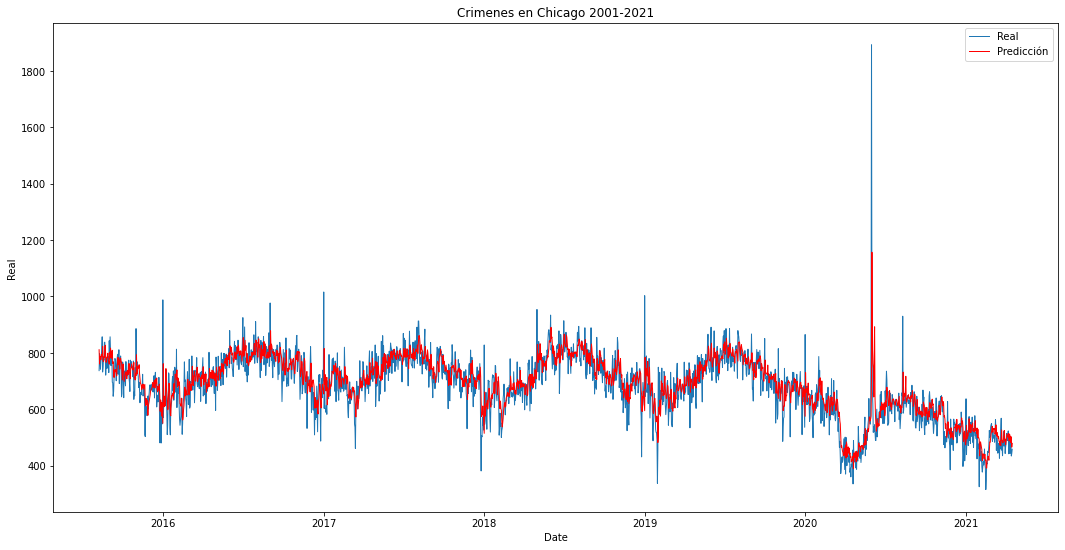

In [ ]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [ ]:
Y_f = []

In [ ]:
for i in range (len(X_test)):
  pred = lin_model.predict(X_f[-1].reshape(1,-1))[0]
  Y_f.append(pred)
  x_tmp = list(X_f[-1][1:])
  x_tmp.append(pred)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [ ]:
y_lm_7_forecasting = np.array(Y_f)

In [ ]:
df_comparation = pd.DataFrame({"Date" : df_comparation["Date"],
                              "Real" : Y_test,
                              "Prediccion" : Y_f})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

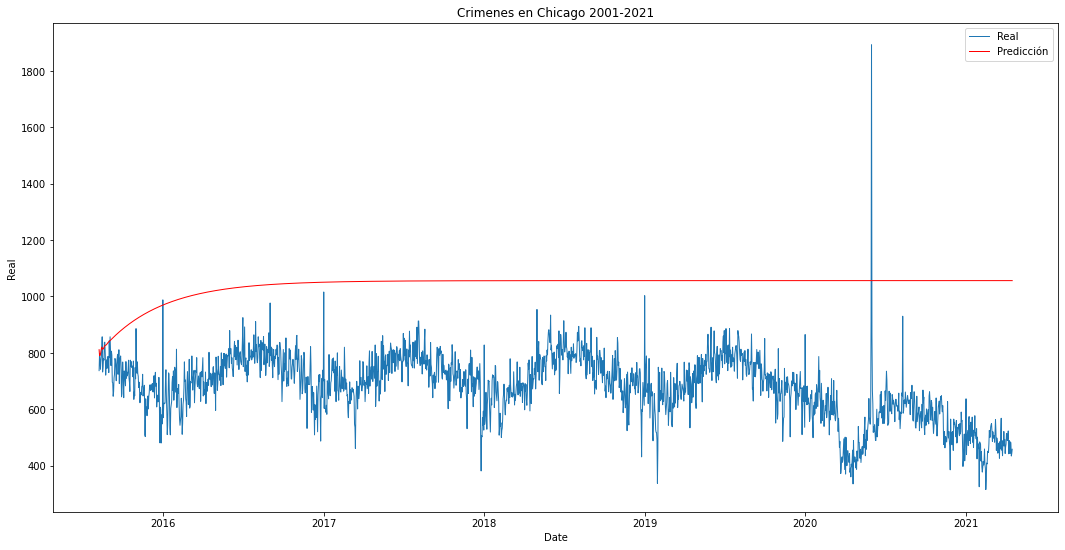

In [ ]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [ ]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 145588.41565111658
r^2 = -10.360105168827719


### Instancia 2:
**Parámetros**
* Elementos por muestra : 14

In [ ]:
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = 14)

In [ ]:
print(X.shape)
print(Y.shape)

(6918, 14)
(6918,)


In [ ]:
n = 14
start = n
end = ts_crime.shape[0] - 1
(start, end)

(14, 6932)

In [ ]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4842, 14)
(2076, 14)
(4842,)
(2076,)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
def get_metrics (real, prediction):
  MSE = (mean_squared_error(real, prediction))
  print("MSE = "+str(MSE))

  r2 = (r2_score(real, prediction))
  print("r^2 = "+str(r2))

In [ ]:
Y_predicted = lin_model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][14:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6918, 3)

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021 LR 2')

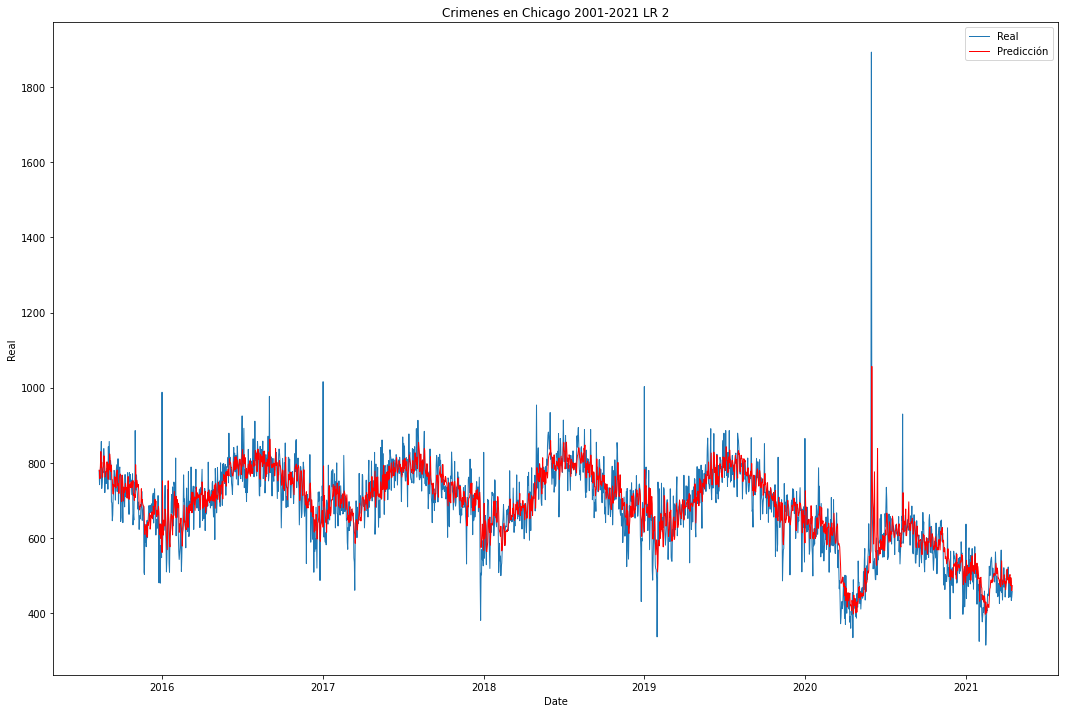

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):], y=df_comparation["Real"][int(X.shape[0]*0.7):], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):],y=df_comparation["Prediccion"][int(X.shape[0]*0.7):], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021 LR 2")

In [ ]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 6467.466594361253
r^2 = 0.9109044227206193


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

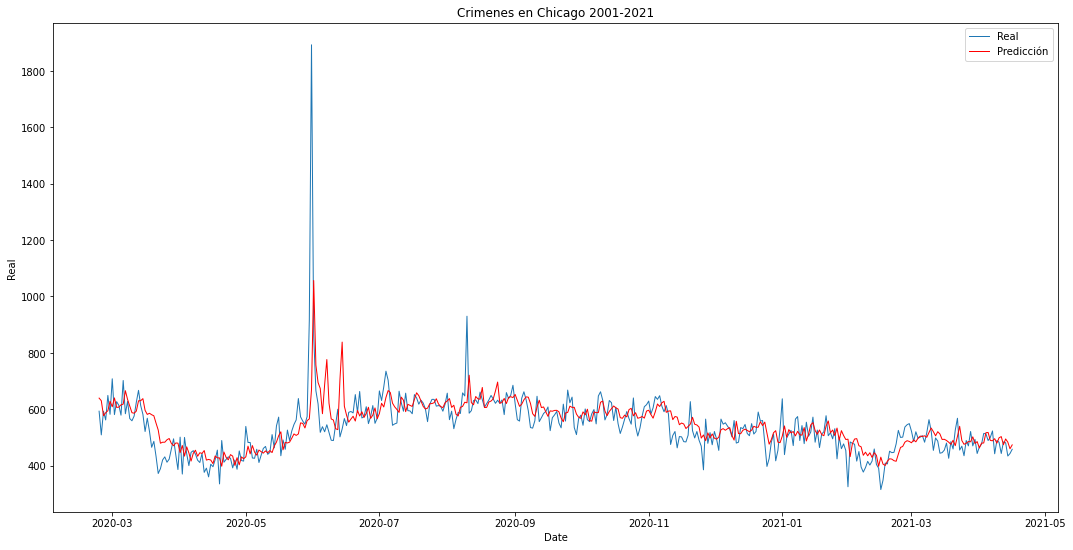

In [ ]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][6500:], y=df_comparation["Real"][6500:], linewidth = 1, label = "Real" , ax = ax)
sns.lineplot(x=df_comparation["Date"][6500:],y=df_comparation["Prediccion"][6500:], linewidth = 1, label = "Predicción" , ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [ ]:
y_lm_14_prediction = lin_model.predict(X_test)
y_lm_14_prediction.shape, X_test.shape

((2076,), (2076, 14))

In [ ]:
get_metrics(y_lm_14_prediction, Y_test)

MSE = 4028.513109098266
r^2 = 0.5680354067848832


In [ ]:
y_lm_14_prediction.shape, y_lm_7_prediction.shape

((2076,), (2078,))

In [ ]:
index = int(X.shape[0]*0.7)
X_f = X[index:index+1]
X_f

array([[755, 748, 752, 760, 959, 806, 722, 745, 753, 793, 815, 837, 737,
        797]])

In [ ]:
df_comparation = pd.DataFrame({"Date" : ts_crime["Date"][int(X.shape[0]*0.7)+14:-1],
                              "Real" : Y_test,
                              "Prediccion" : y_lm_14_prediction})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

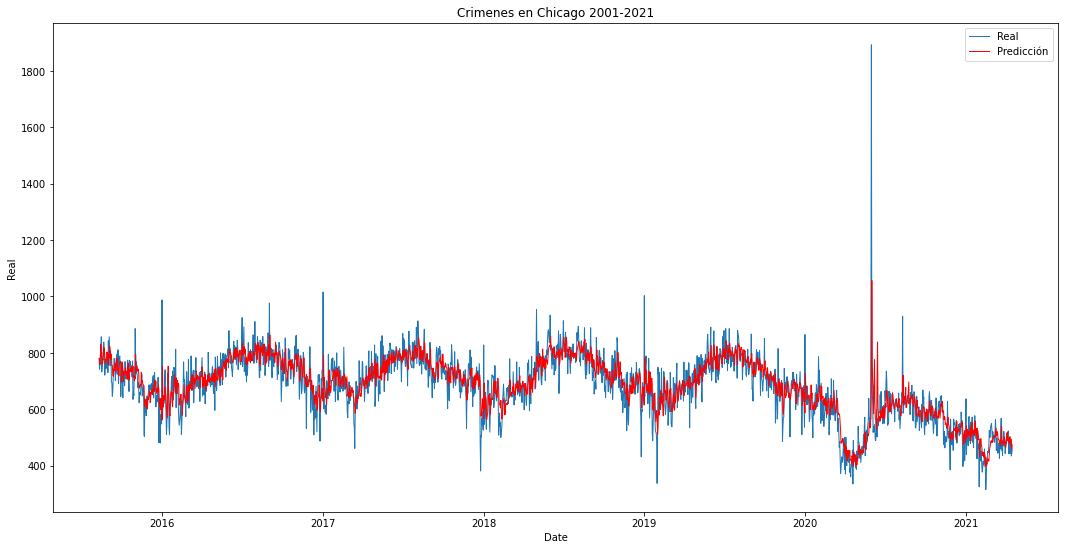

In [ ]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [ ]:
Y_f = []

In [ ]:
for i in range (len(X_test)):
  pred = lin_model.predict(X_f[-1].reshape(1,-1))[0]
  Y_f.append(pred)
  x_tmp = list(X_f[-1][1:])
  x_tmp.append(pred)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [ ]:
y_lm_14_forecasting = np.array(Y_f)

In [ ]:
df_comparation = pd.DataFrame({"Date" : ts_crime["Date"][int(X.shape[0]*0.7)+14:-1],
                              "Real" : Y_test,
                              "Prediccion" : y_lm_14_forecasting})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

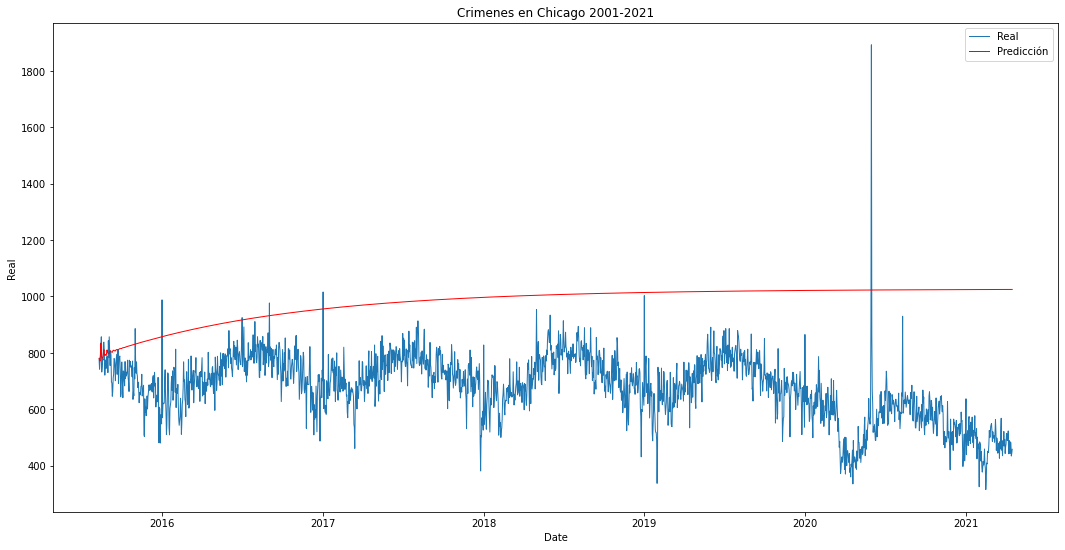

In [ ]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [ ]:
get_metrics(y_lm_14_forecasting, Y_test)

MSE = 109249.23144584989
r^2 = -30.66459700193283


## Modelo LSTM

LSTM significa memoria a corto plazo. Es un modelo o arquitectura que amplía la memoria de las redes neuronales recurrentes. Por lo general, las redes neuronales recurrentes tienen "memoria a corto plazo" en el sentido de que utilizan información previa persistente para ser utilizada en la red neuronal actual. Esencialmente, la información anterior se utiliza en la presente tarea. Eso significa que no tenemos una lista de toda la información previa disponible para el nodo neural. 


In [ ]:
# Librerias para el modelo LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model

import time
from sklearn.preprocessing import MinMaxScaler

### Instancia 1:
**Parámetros**
* Elementos por muestra : 30
* Capas ocultas: 3 (50,50,50)
* Optimizador : adam
* loss = mean squared error

In [ ]:
ts_crime.head()

Date  Total_Crimes
0 2002-04-25          1294
1 2002-04-26          1367
2 2002-04-27          1254
3 2002-04-28          1119
4 2002-04-29          1447

In [ ]:
# Scale features
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(ts_crime[["Total_Crimes"]])

# Scale predicted value
s2 = MinMaxScaler(feature_range=(0,1))
Ys = s2.fit_transform(ts_crime[["Total_Crimes"]])

In [ ]:
# Each time step uses last 'window' to predict the next change
window = 30
X = []
Y = []
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

# Reshape data to format accepted by LSTM
X, Y = np.array(X), np.array(Y)

In [ ]:
train = ts_crime[:int(X.shape[0]*0.7)]
test = ts_crime[int(X.shape[0]*0.7):]

In [ ]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4832, 30, 1)
(2071, 30, 1)
(4832, 1)
(2071, 1)


In [ ]:
# create and train LSTM model

# Initialize LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, \
          input_shape=((X.shape[1],X.shape[2])))) #(30,1)
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

In [ ]:
# Allow for early exit
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# Fit (and time) LSTM model
t0 = time.time()
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 250, callbacks=[es], verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/10
20/20 [==============================] - 25s 143ms/step - loss: 0.0850 - accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 3s 140ms/step - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 3s 140ms/step - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 3s 136ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 3s 139ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 3s 138ms/step - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 3s 139ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 8/10
20/20 [==============================] - 3s 140ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 9/10
20/20 [==============================] - 3s 138ms/step - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 10/10
20/20 [==============================] - 3s 139ms/s

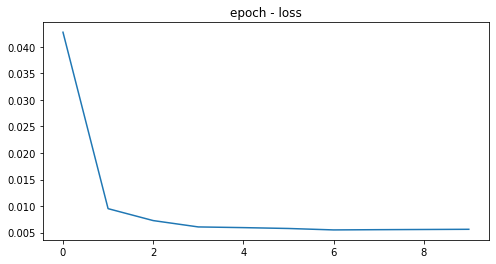

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
sns.lineplot(data = history.history['loss'], ax = ax)
ax.set_title("epoch - loss");

In [ ]:
# Verify the fit of the model
Yp = model.predict(X_train)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_train)

In [ ]:
Ym = Ym[:,0]
Yu = Yu[:,0]

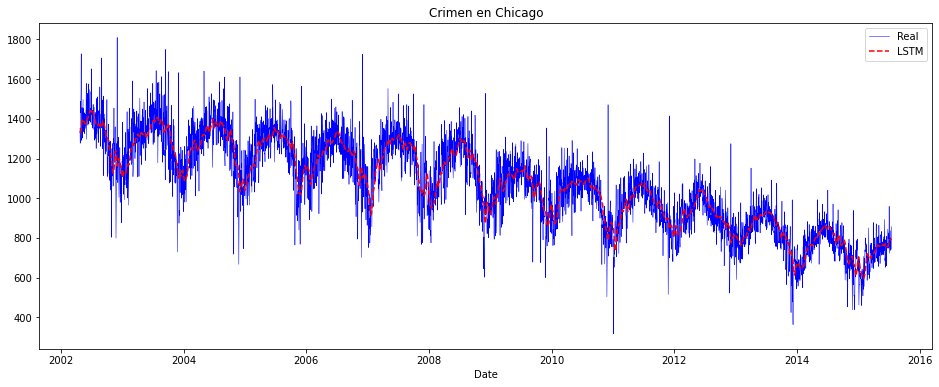

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = train["Date"], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
sns.lineplot(x = train["Date"], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
ax.set_title("Crimen en Chicago");

In [ ]:
get_metrics(Ym, Yu)

MSE = 9332.800605506114
r^2 = 0.8210765172948455


In [ ]:
# Verify the fit of the model
Yp = model.predict(X_test)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_test)

In [ ]:
Ym = Ym[:,0]
Yu = Yu[:,0]

In [ ]:
get_metrics(Ym, Yu)

MSE = 5138.232382953566
r^2 = 0.599584952695398


In [ ]:
y_lstm_30_prediction = Yu

In [ ]:
test["Date"][window:].shape

(2071,)

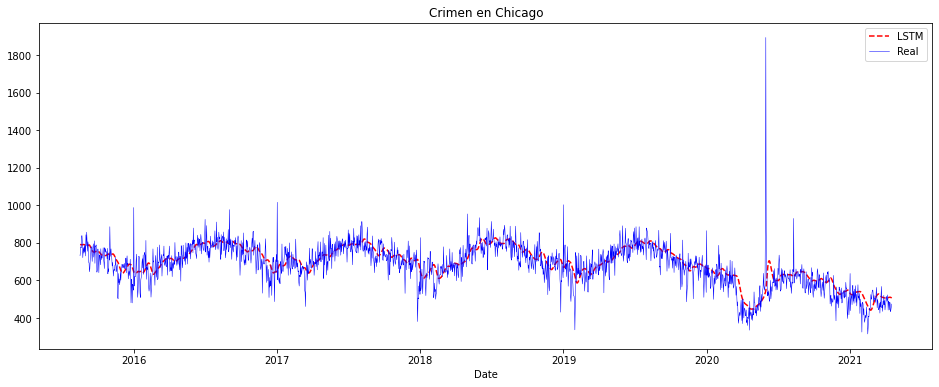

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [ ]:
X_f = X_test[-1:]
X_f.shape

(1, 30, 1)

In [ ]:
pred = model.predict(X_f[-1:])[0]
pred

array([0.12126096], dtype=float32)

In [ ]:
x_tmp = X_f[-1][1:]
x_tmp = np.append(x_tmp, pred).reshape(-1,1)
X_f = np.append(X_f,[x_tmp], axis=0)

In [ ]:
X_f = X_test[-1:]
Y_f = []
for _ in range(len(X_test)):
  pred = model.predict(X_f[-1:])[0]
  Y_f.append(pred[0])
  x_tmp = X_f[-1][1:]
  x_tmp = np.append(x_tmp, pred).reshape(-1,1)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [ ]:
Yu = s2.inverse_transform(np.array(Y_f).reshape(-1,1))

In [ ]:
Ym = s2.inverse_transform(Y_test)
Ym = Ym[:,0]

In [ ]:
Yu = Yu[:,0]

In [ ]:
y_lstm_30_forecasting = Yu

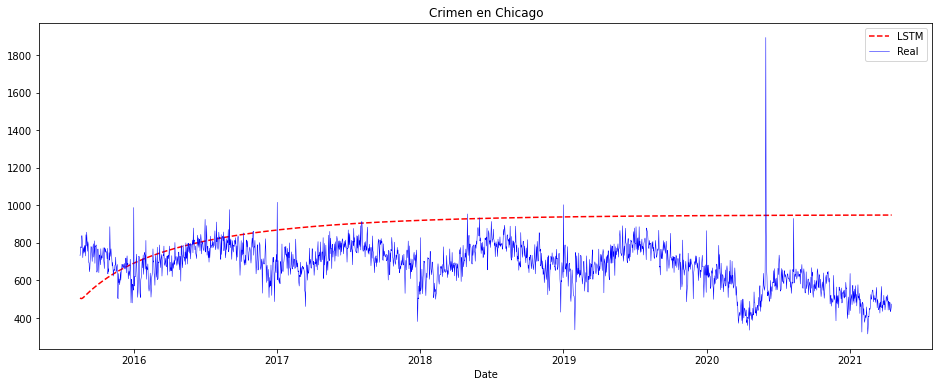

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [ ]:
get_metrics(Ym, y_lstm_30_forecasting)

MSE = 69081.41680808701
r^2 = -4.38341529099523


### Instancia 2:
**Parámetros**
* Elementos por muestra : 60
* Capas ocultas: 3 (50,50,50)
* Optimizador : adam
* loss = mean squared error

In [ ]:
ts_crime.head()

Date  Total_Crimes
0 2002-04-25          1294
1 2002-04-26          1367
2 2002-04-27          1254
3 2002-04-28          1119
4 2002-04-29          1447

In [ ]:
# Scale features
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(ts_crime[["Total_Crimes"]])

# Scale predicted value
s2 = MinMaxScaler(feature_range=(0,1))
Ys = s2.fit_transform(ts_crime[["Total_Crimes"]])

In [ ]:
# Each time step uses last 'window' to predict the next change
window = 60
X = []
Y = []
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

# Reshape data to format accepted by LSTM
X, Y = np.array(X), np.array(Y)

In [ ]:
train = ts_crime[:int(X.shape[0]*0.7)]
test = ts_crime[int(X.shape[0]*0.7):]

In [ ]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4811, 60, 1)
(2062, 60, 1)
(4811, 1)
(2062, 1)


In [ ]:
# create and train LSTM model

# Initialize LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, \
          input_shape=((X.shape[1],X.shape[2])))) #(60,1)
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

In [ ]:
# Allow for early exit
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# Fit (and time) LSTM model
t0 = time.time()
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 250, callbacks=[es], verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/10
20/20 [==============================] - 11s 266ms/step - loss: 0.0924 - accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 5s 264ms/step - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 5s 262ms/step - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 5s 267ms/step - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 5s 264ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 5s 263ms/step - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 5s 266ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 8/10
20/20 [==============================] - 5s 265ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 9/10
20/20 [==============================] - 5s 266ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 10/10
20/20 [==============================] - 5s 264ms/s

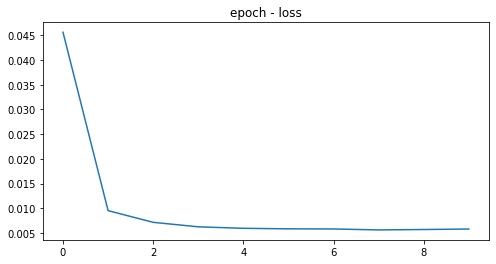

In [ ]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
sns.lineplot(data = history.history['loss'], ax = ax)
ax.set_title("epoch - loss");

In [ ]:
# Verify the fit of the model
Yp = model.predict(X_train)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_train)

In [ ]:
Ym = Ym[:,0]
Yu = Yu[:,0]

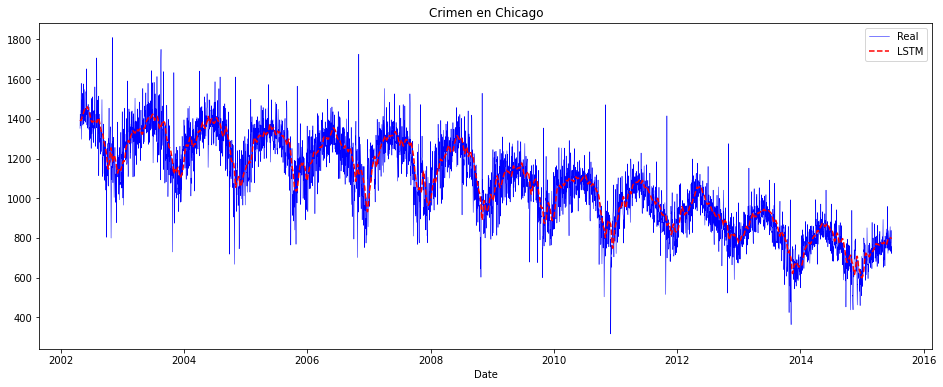

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = train["Date"], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
sns.lineplot(x = train["Date"], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
ax.set_title("Crimen en Chicago");

In [ ]:
get_metrics(Ym, Yu)

MSE = 9541.09485607188
r^2 = 0.8159226699529096


In [ ]:
# Verify the fit of the model
Yp = model.predict(X_test)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_test)

In [ ]:
get_metrics(Ym, Yu)

MSE = 5411.4777257120095
r^2 = 0.5785603294700428


In [ ]:
Ym = Ym[:,0]
Yu = Yu[:,0]

In [ ]:
y_lstm_60_prediction = Yu

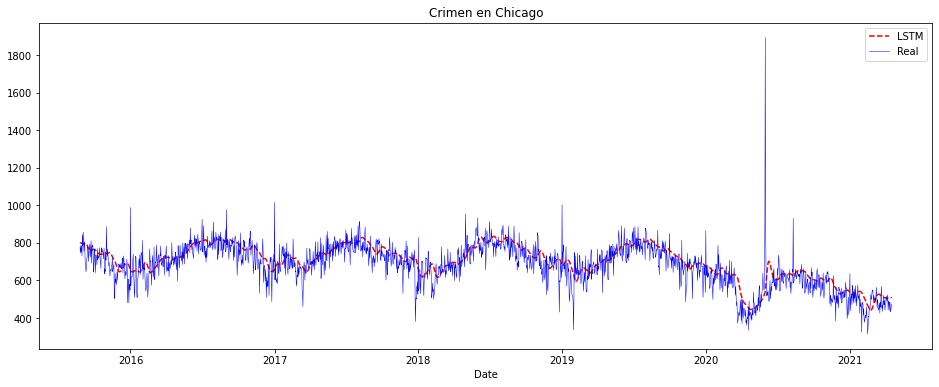

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [ ]:
X_f = X_test[-1:]
X_f.shape

(1, 60, 1)

In [ ]:
pred = model.predict(X_f[-1:])[0]
pred

array([0.12174386], dtype=float32)

In [ ]:
x_tmp = X_f[-1][1:]
x_tmp = np.append(x_tmp, pred).reshape(-1,1)
X_f = np.append(X_f,[x_tmp], axis=0)

In [ ]:
X_f = X_test[-1:]
Y_f = []
for _ in range(len(X_test)):
  pred = model.predict(X_f[-1:])[0]
  Y_f.append(pred[0])
  x_tmp = X_f[-1][1:]
  x_tmp = np.append(x_tmp, pred).reshape(-1,1)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [ ]:
Yu = s2.inverse_transform(np.array(Y_f).reshape(-1,1))

In [ ]:
Yu = Yu[:,0]
Yu.shape

(2062,)

In [ ]:
y_lstm_60_forecasting = Yu

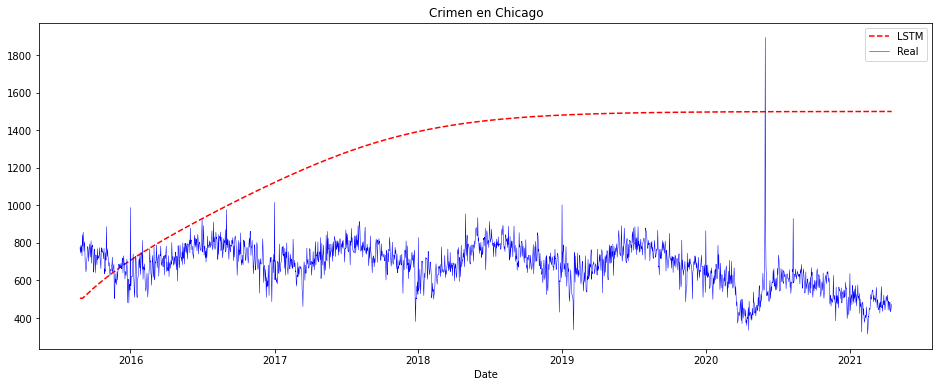

In [ ]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [ ]:
get_metrics(Ym, y_lstm_60_forecasting)

MSE = 481157.67451428314
r^2 = -36.47200711125157


## Prophet

Prophet es un procedimiento para pronosticar datos de series de tiempo basado en un modelo aditivo en el que las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria, además de los efectos de las estacionales. Funciona mejor con series de tiempo que tienen fuertes efectos estacionales y varias temporadas de datos históricos. Prophet es robusto ante los datos faltantes y los cambios en la tendencia, y por lo general maneja bien los valores atípicos.


In [ ]:
# Importamos Prophet
from fbprophet import Prophet

In [ ]:
# Tenemos una data frame de cada fecha en que se cometio un crimen en Chicago
# dese 2002 a 2021
df_pr = ts_crime.copy()
df_pr

Date  Total_Crimes
0    2002-04-25          1294
1    2002-04-26          1367
2    2002-04-27          1254
3    2002-04-28          1119
4    2002-04-29          1447
...         ...           ...
6928 2021-04-13           481
6929 2021-04-14           434
6930 2021-04-15           443
6931 2021-04-16           458
6932 2021-04-17           474

[6933 rows x 2 columns]

In [ ]:
# Prophet necesita un formato muy epscifico para utilizar su libreria
# Asi que nombraremos las fechas con Date = "ds" y Total_Crimenes = "y"
df_pr.columns = ['ds', 'y']
df_pr

ds     y
0    2002-04-25  1294
1    2002-04-26  1367
2    2002-04-27  1254
3    2002-04-28  1119
4    2002-04-29  1447
...         ...   ...
6928 2021-04-13   481
6929 2021-04-14   434
6930 2021-04-15   443
6931 2021-04-16   458
6932 2021-04-17   474

[6933 rows x 2 columns]

In [ ]:
# Dividimos nuestros datos en train y tes
train_data_pr = df_pr[:len(ts_crime)-100]
test_data_pr = df_pr[:len(ts_crime)-12:]

In [ ]:
print (train_data_pr.shape)
print (test_data_pr.shape)

(6833, 2)
(6921, 2)


In [ ]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=100)
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       trend  ...  multiplicative_terms_upper        yhat
6928 2021-04-13  575.382052  ...                         0.0  555.999991
6929 2021-04-14  575.259605  ...                         0.0  564.162762
6930 2021-04-15  575.137158  ...                         0.0  555.127817
6931 2021-04-16  575.014712  ...                         0.0  611.558146
6932 2021-04-17  574.892265  ...                         0.0  564.257708

[5 rows x 19 columns]

In [ ]:
test_data = prophet_pred[["ds", "yhat"]][-100:]
test_data

ds        yhat
6833 2021-01-08  539.788182
6834 2021-01-09  492.513785
6835 2021-01-10  445.831530
6836 2021-01-11  480.378049
6837 2021-01-12  493.291764
...         ...         ...
6928 2021-04-13  555.999991
6929 2021-04-14  564.162762
6930 2021-04-15  555.127817
6931 2021-04-16  611.558146
6932 2021-04-17  564.257708

[100 rows x 2 columns]

In [ ]:
test_data["Real"] = ts_crime["Total_Crimes"][-100:]

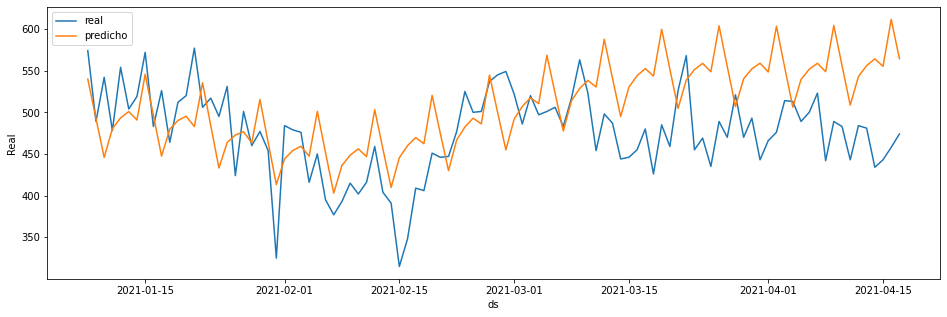

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data['ds'], y=test_data["Real"], label = "real")
sns.lineplot(x=test_data['ds'], y = test_data["yhat"], label= "predicho");

In [ ]:
test_data = prophet_pred[["ds", "yhat"]]
test_data["Real"] = ts_crime["Total_Crimes"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



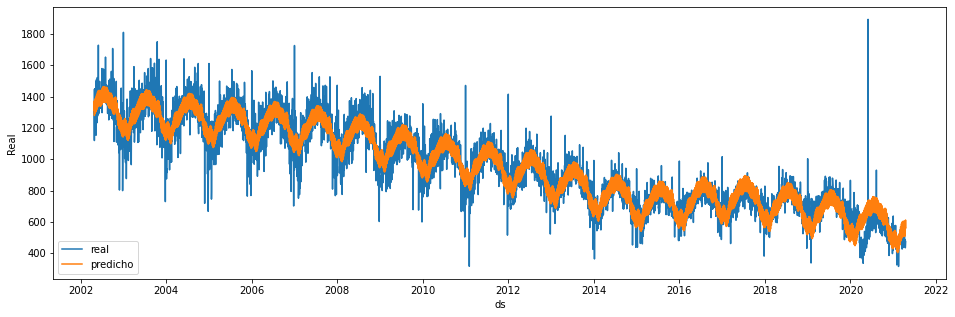

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data['ds'], y=test_data["Real"], label = "real")
sns.lineplot(x=test_data['ds'], y = test_data["yhat"], label= "predicho");

In [ ]:
y_prophet_forecasting = test_data["yhat"][-100:]

In [ ]:
get_metrics(test_data["Real"][-100:], test_data["yhat"][-100:])

MSE = 4250.698384536354
r^2 = -0.6479407554223284


## SARIMAX

ARIMA es un modelo que se utiliza para predecir tendencias futuras en una serie de datos de tiempo.

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.3MB/s 
     |████████████████████████████████| 9.5MB 22.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima    

In [ ]:
df_ar = ts_crime.copy()
df_ar = df_ar.set_index("Date")

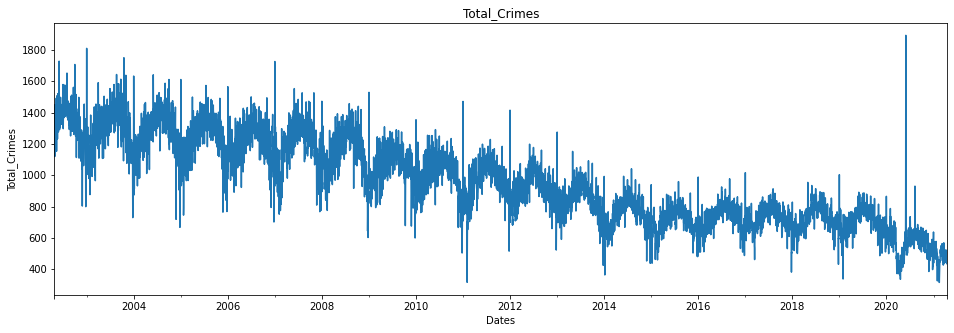

In [ ]:
df_ar.index.freq = "D"
ax = df_ar['Total_Crimes'].plot(figsize = (16,5), title = "Total_Crimes")
ax.set(xlabel='Dates', ylabel='Total_Crimes');

<Figure size 1152x432 with 0 Axes>

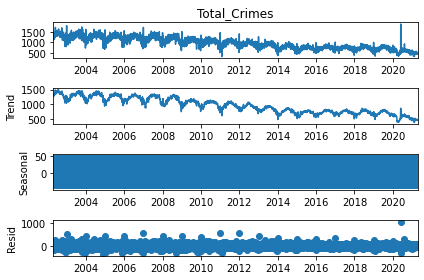

In [ ]:
a = seasonal_decompose(df_ar["Total_Crimes"], model = "add")
fig = plt.figure(figsize=(16,6))
a.plot();

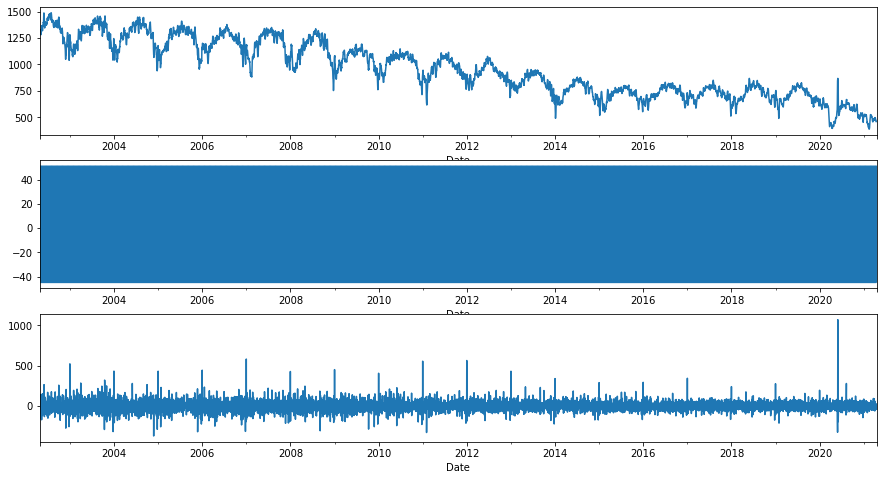

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
a.trend.plot(ax=ax1)
a.resid.plot(ax=ax3)
a.seasonal.plot(ax=ax2)

In [ ]:
auto_arima(df_ar['Total_Crimes'], seasonal=True, frequency=365).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6933
Model:               SARIMAX(0, 1, 3)   Log Likelihood              -40445.754
Date:                Wed, 23 Jun 2021   AIC                          80899.508
Time:                        22:23:30   BIC                          80926.884
Sample:                             0   HQIC                         80908.946
                               - 6933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6236      0.007    -84.266      0.000      -0.638      -0.609
ma.L2         -0.1897      0.012    -15.220      0.000      -0.214      -0.165
ma.L3         -0.0537      0.011     -4.754      0.000      -0.076      -0.032
sigma2      6844.6447     45.546    150.280      0.000    6755.377    6933.913
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             45358.77
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_data = df_ar[:-100]
test_data = df_ar[-100:]
arima_model = SARIMAX(train_data['Total_Crimes'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                               Total_Crimes   No. Observations:                 6833
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood              -39727.027
Date:                                    Wed, 23 Jun 2021   AIC                          79476.055
Time:                                            22:27:22   BIC                          79551.178
Sample:                                        04-25-2002   HQIC                         79501.972
                                             - 01-07-2021                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3003      0.010     28.894      0.000       0.280       0.321
ar.L2          0.0225      0.013      1.735      0.083      -0.003       0.048
ma.L1         -0.9042      0.006   -139.524      0.000      -0.917      -0.891
ar.S.L12      -0.8332      0.019    -43.609      0.000      -0.871      -0.796
ar.S.L24       0.7589      0.028     27.194      0.000       0.704       0.814
ar.S.L36       0.9863      0.020     49.423      0.000       0.947       1.025
ar.S.L48       0.0150      0.013      1.117      0.264      -0.011       0.041
ma.S.L12       0.8069      0.013     60.316      0.000       0.781       0.833
ma.S.L24      -0.7879      0.022    -35.316      0.000      -0.832      -0.744
ma.S.L36      -0.9686      0.013    -73.609      0.000      -0.994      -0.943
sigma2      7094.9513     51.734    137.143      0.000    6993.554    7196.348
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):             51800.14
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df_ar)-1, typ="levels").rename("ARIMA Predictions")
len(arima_pred)

100

In [ ]:
y_sarimax = arima_pred.values

In [ ]:
ts_crime.tail()


Date  Total_Crimes
6928 2021-04-13           481
6929 2021-04-14           434
6930 2021-04-15           443
6931 2021-04-16           458
6932 2021-04-17           474

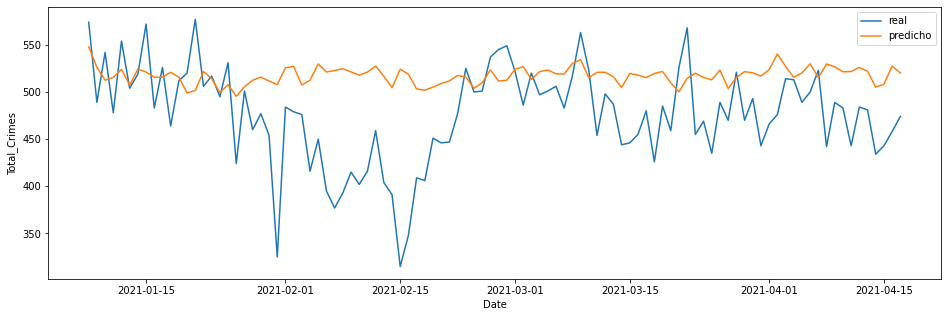

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= ts_crime["Date"][-100:], y = ts_crime["Total_Crimes"][-100:], label = "real")
sns.lineplot(x=ts_crime["Date"][-100:], y = y_sarimax, label= "predicho");

In [ ]:
get_metrics(ts_crime["Total_Crimes"][-100:], y_sarimax)

MSE = 4244.087390480223
r^2 = -0.6453777585796008


In [ ]:
test_100 = ts_crime[-100:]

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

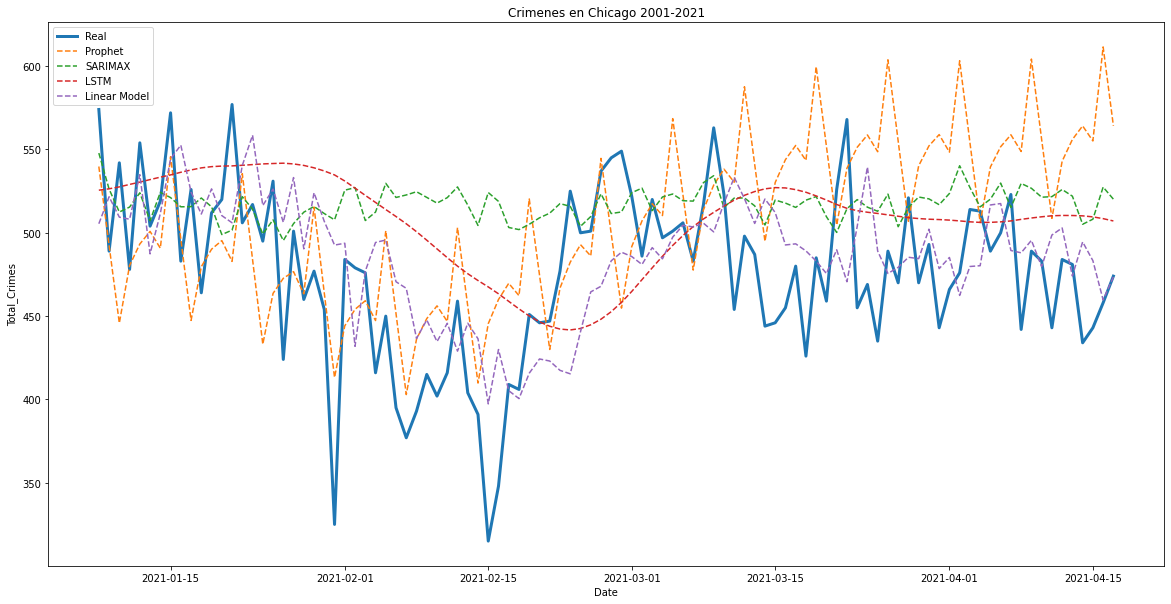

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
sns.lineplot(x = test_100["Date"], y=test_100["Total_Crimes"], linewidth = 3, label = "Real" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_prophet_forecasting, linewidth = 1.5, ls = "--", label = "Prophet" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_sarimax, linewidth = 1.5,ls = "--", label = "SARIMAX" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_lstm_60_prediction[-100:], linewidth = 1.5,ls = "--", label = "LSTM" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_lm_14_prediction[-100:], linewidth = 1.5,ls = "--", label = "Linear Model" ,ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

# Aplicación de Prophet

## Separación en Distritos

In [ ]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Total                            int64
Day                             object
dtype: object

In [ ]:
df["District"] = df["District"].apply(lambda x: int(x))

In [ ]:
districts = df["District"].unique()
districts = sorted(districts)

In [ ]:
districts

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25]

In [ ]:
dates = df_grouped_day["Date"]

In [ ]:
dates

476     2002-04-25
477     2002-04-26
478     2002-04-27
479     2002-04-28
480     2002-04-29
           ...    
7405    2021-04-14
7406    2021-04-15
7407    2021-04-16
7408    2021-04-17
7409    2021-04-18
Name: Date, Length: 6934, dtype: object

In [ ]:
dict_districts = {}
for district in districts:
  dict_districts[f"District {district}"] = []

In [ ]:
df_grouped_day

Date  Total_Crimes
476   2002-04-25          1294
477   2002-04-26          1367
478   2002-04-27          1254
479   2002-04-28          1119
480   2002-04-29          1447
...          ...           ...
7405  2021-04-14           434
7406  2021-04-15           443
7407  2021-04-16           458
7408  2021-04-17           474
7409  2021-04-18             1

[6934 rows x 2 columns]

In [ ]:
prueba = df.groupby(["Day", "District"])["Total"].sum()

In [ ]:
prueba.transpose()

Day         District
2001-01-01  1            8
            2           11
            3            9
            4           13
            5           15
                        ..
2021-04-17  20           8
            22          20
            24          10
            25          28
2021-04-18  4            1
Name: Total, Length: 156942, dtype: int64

In [ ]:
df[df["District"] == 1].groupby("Day")["Total"].sum()

Day
2001-01-01     8
2001-01-05     1
2001-01-10     1
2001-01-16     1
2001-01-30     1
              ..
2021-04-13    17
2021-04-14     9
2021-04-15    15
2021-04-16    20
2021-04-17    18
Name: Total, Length: 7111, dtype: int64

In [ ]:
df_list = []
for district in districts:
  tmp = df[df["District"] == district].groupby("Day")["Total"].sum()
  df_tmp = pd.DataFrame({"Date": tmp.index, f"District {district}": tmp.values})
  df_list.append(df_tmp)

In [ ]:
len(df_list)

22

In [ ]:
df_districts = df_grouped_day.copy()

In [ ]:
df_districts.dtypes

Date            object
Total_Crimes     int64
dtype: object

In [ ]:
df_districts

Date  Total_Crimes
476   2002-04-25          1294
477   2002-04-26          1367
478   2002-04-27          1254
479   2002-04-28          1119
480   2002-04-29          1447
...          ...           ...
7405  2021-04-14           434
7406  2021-04-15           443
7407  2021-04-16           458
7408  2021-04-17           474
7409  2021-04-18             1

[6934 rows x 2 columns]

In [ ]:
pd.merge(df_districts, df_list[0], how = "left", on = "Date")

Date  Total_Crimes  District 1
0     2002-04-25          1294        48.0
1     2002-04-26          1367        68.0
2     2002-04-27          1254        32.0
3     2002-04-28          1119        30.0
4     2002-04-29          1447        91.0
...          ...           ...         ...
6929  2021-04-14           434         9.0
6930  2021-04-15           443        15.0
6931  2021-04-16           458        20.0
6932  2021-04-17           474        18.0
6933  2021-04-18             1         NaN

[6934 rows x 3 columns]

In [ ]:
for data in df_list:
  df_districts = pd.merge(df_districts, data, how = "left", on = "Date")

In [ ]:
df_districts = df_districts.fillna(0)

In [ ]:
df_districts.sample(3)

Date  Total_Crimes  ...  District 24  District 25
3624  2012-03-27           867  ...         17.0         52.0
3816  2012-10-05           912  ...         31.0         47.0
4353  2014-03-26           722  ...         17.0         53.0

[3 rows x 24 columns]

In [ ]:
df_districts.to_csv("crimes_by_districts.csv")

## Obtención de serie de tiempo

In [ ]:
df["Total"] = 1

In [ ]:
df["Day"] = df["Date"].apply(lambda d: d.date())

In [ ]:
df[["Date","Day"]].head()

Date         Day
0 2015-09-05 13:30:00  2015-09-05
1 2015-09-04 11:30:00  2015-09-04
3 2015-09-05 12:45:00  2015-09-05
4 2015-09-05 13:00:00  2015-09-05
5 2015-09-05 10:55:00  2015-09-05

In [ ]:
df_grouped_day = df.groupby("Day")["Total"].sum()

In [ ]:
df_grouped_day = pd.DataFrame({"Date":df_grouped_day.index,"Total_Crimes":df_grouped_day.values})
df_grouped_day

Date  Total_Crimes
0     2001-01-01           274
1     2001-01-02            10
2     2001-01-03             4
3     2001-01-05             6
4     2001-01-06             6
...          ...           ...
7405  2021-04-14           434
7406  2021-04-15           443
7407  2021-04-16           458
7408  2021-04-17           474
7409  2021-04-18             1

[7410 rows x 2 columns]

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

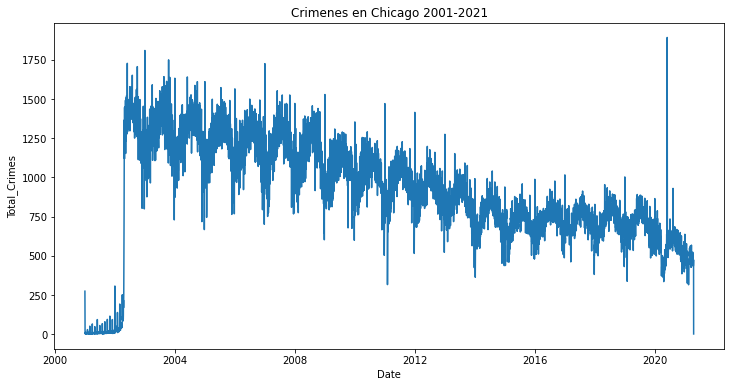

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
sns.lineplot(x=df_grouped_day["Date"], y=df_grouped_day["Total_Crimes"], ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

In [ ]:
df_grouped_day[460:480]

Date  Total_Crimes
460  2002-04-09           123
461  2002-04-10           128
462  2002-04-11           136
463  2002-04-12           126
464  2002-04-13            97
465  2002-04-14           119
466  2002-04-15           217
467  2002-04-16           168
468  2002-04-17           170
469  2002-04-18           198
470  2002-04-19           262
471  2002-04-20           378
472  2002-04-21           341
473  2002-04-22           558
474  2002-04-23           796
475  2002-04-24          1073
476  2002-04-25          1294
477  2002-04-26          1367
478  2002-04-27          1254
479  2002-04-28          1119

Se observó que a finales de abril del 2002 los crímenes aumentaron muy rapido, esto se debió probablemente a que los datos no estaban recopilados correctamente, y en esas fechas se mejoró el método de recopilación. Se eliminarán los datos de antes del 25 de abril del 2002.

In [ ]:
df_grouped_day = df_grouped_day[df_grouped_day["Date"] >= dt.date(2002,4,25)]
df_grouped_day

Date  Total_Crimes
476   2002-04-25          1294
477   2002-04-26          1367
478   2002-04-27          1254
479   2002-04-28          1119
480   2002-04-29          1447
...          ...           ...
7405  2021-04-14           434
7406  2021-04-15           443
7407  2021-04-16           458
7408  2021-04-17           474
7409  2021-04-18             1

[6934 rows x 2 columns]

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

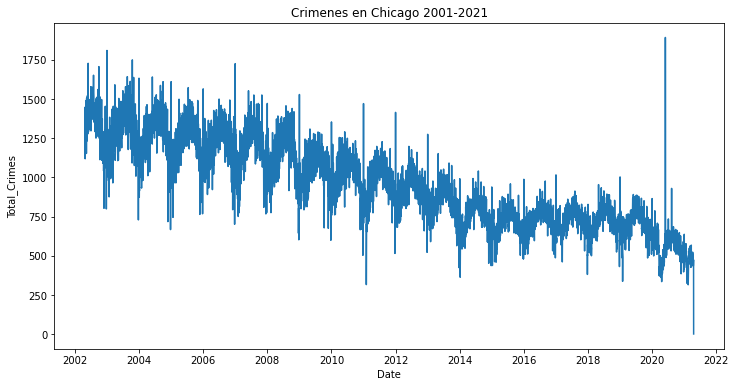

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
sns.lineplot(x=df_grouped_day["Date"], y=df_grouped_day["Total_Crimes"], ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

In [ ]:
df_grouped_day.to_csv("crime_time_series.csv")

In [ ]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

In [ ]:
X,Y = transformarSerieADataset(df_grouped_day["Total_Crimes"].to_numpy(), 3)

In [ ]:
X[:10]

array([[1294, 1367, 1254],
       [1367, 1254, 1119],
       [1254, 1119, 1447],
       [1119, 1447, 1322],
       [1447, 1322, 1450],
       [1322, 1450, 1244],
       [1450, 1244, 1296],
       [1244, 1296, 1283],
       [1296, 1283, 1254],
       [1283, 1254, 1234]])

In [ ]:
Y[:10]

array([1119, 1447, 1322, 1450, 1244, 1296, 1283, 1254, 1234, 1278])

## Entrenamiento de modelo por cada distrito

In [ ]:
# Importamos Prophet
from fbprophet import Prophet

In [ ]:
url = "https://raw.githubusercontent.com/EduHdzVillasana/Proyecto_ML_BEDU/main/crimes_by_districts.csv"
df_districts = pd.read_csv(url, index_col=0)

In [ ]:
df_districts.sample(5)

Date  Total_Crimes  ...  District 24  District 25
529   2003-10-06          1408  ...         27.0         77.0
6250  2019-06-05           783  ...         28.0         41.0
5331  2016-11-28           688  ...         19.0         31.0
1295  2005-11-10          1233  ...         32.0         68.0
2448  2009-01-06           966  ...         28.0         61.0

[5 rows x 24 columns]

In [ ]:
def get_metrics (real, prediction, label = ""):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  MSE = (mean_squared_error(real, prediction))
  r2 = (r2_score(real, prediction))
  print(label +" MSE = "+str(MSE) + " r^2 = "+str(r2))
  return {"MSE": MSE, "r2": r2}

In [ ]:
predictions_dict = {}
models_by_district = {}
scores = {}
scores["Distrito"] = []
scores["MSE"] = []
scores["r2"] = []
scores["std"] = []
for district in districts:
  district_string = f"District {district}"
  df_tmp = df_districts[["Date",district_string]].copy()
  df_tmp.columns = ['ds', 'y']
  model = Prophet();
  model.fit(df_tmp)
  models_by_district[district_string] = model
  future = model.make_future_dataframe(periods = 100)
  prediction = model.predict(future)
  prediction = prediction[["ds","yhat"]]
  predictions_dict[district_string] = prediction["yhat"]
  metrics = get_metrics(df_tmp["y"], prediction["yhat"][:-100], district_string)
  scores["Distrito"].append(district_string)
  scores["MSE"].append(metrics["MSE"])
  scores["r2"].append(metrics["r2"])
  scores["std"].append(np.sqrt(metrics["MSE"]))
  predictions_dict["Date"] = prediction["ds"]
  
  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 1 MSE = 82.38468270560837 r^2 = 0.47075407051018237


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 2 MSE = 72.89431938836422 r^2 = 0.7487736731324428


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 3 MSE = 72.38293518098352 r^2 = 0.7344055530917084


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 4 MSE = 86.93468595854317 r^2 = 0.7032851732907541


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 5 MSE = 63.722582385487726 r^2 = 0.66347793215521


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 6 MSE = 85.57254597575515 r^2 = 0.6568800236591888


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 7 MSE = 96.85635795914881 r^2 = 0.7611552789282959


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 8 MSE = 103.3802586643919 r^2 = 0.7828192032735638


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 9 MSE = 70.44584515912781 r^2 = 0.7578205416064194


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 10 MSE = 64.8303047086591 r^2 = 0.5686079646822246


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 11 MSE = 153.34704126184906 r^2 = 0.5484377404931537


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 12 MSE = 73.8465264609867 r^2 = 0.7044288891578541


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 14 MSE = 55.835759340213265 r^2 = 0.7327155942977185


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 15 MSE = 105.37161777194011 r^2 = 0.5795716626719775


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 16 MSE = 44.07846115373398 r^2 = 0.5742892128273562


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 17 MSE = 36.52964078186977 r^2 = 0.6076954700313704


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 18 MSE = 80.79208065199471 r^2 = 0.5901386346580104


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 19 MSE = 73.19618549561947 r^2 = 0.6599999835635757


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 20 MSE = 21.09238424556251 r^2 = 0.5211987101205685


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 22 MSE = 44.796768531783854 r^2 = 0.6350453728611716


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 24 MSE = 37.702837787341494 r^2 = 0.6463714272901413
District 25 MSE = 84.5326355750513 r^2 = 0.7505193677474984


In [ ]:
pd.DataFrame(scores)

Distrito         MSE        r2        std
0    District 1   82.384683  0.470754   9.076601
1    District 2   72.894319  0.748774   8.537817
2    District 3   72.382935  0.734406   8.507816
3    District 4   86.934686  0.703285   9.323877
4    District 5   63.722582  0.663478   7.982643
5    District 6   85.572546  0.656880   9.250543
6    District 7   96.856358  0.761155   9.841563
7    District 8  103.380259  0.782819  10.167608
8    District 9   70.445845  0.757821   8.393202
9   District 10   64.830305  0.568608   8.051727
10  District 11  153.347041  0.548438  12.383337
11  District 12   73.846526  0.704429   8.593400
12  District 14   55.835759  0.732716   7.472333
13  District 15  105.371618  0.579572  10.265068
14  District 16   44.078461  0.574289   6.639161
15  District 17   36.529641  0.607695   6.043976
16  District 18   80.792081  0.590139   8.988442
17  District 19   73.196185  0.660000   8.555477
18  District 20   21.092384  0.521199   4.592645
19  District 22   44.796769  0.635045   6.693039
20  District 24   37.702838  0.646371   6.140264
21  District 25   84.532636  0.750519   9.194163

In [ ]:
predictions_df = pd.DataFrame(predictions_dict)
predictions_df["Date"] = pd.to_datetime(predictions_df.Date)
predictions_df

District 1       Date  District 2  ...  District 22  District 24  District 25
0      46.676139 2002-04-25   74.038418  ...    43.002777    38.630585    74.328398
1      49.723972 2002-04-26   75.378737  ...    44.794319    40.169646    77.513747
2      42.903566 2002-04-27   71.529167  ...    41.238466    38.952881    75.381041
3      37.228249 2002-04-28   69.370434  ...    40.774740    38.179468    74.099839
4      45.553441 2002-04-29   74.287321  ...    43.805602    40.000677    74.834016
...          ...        ...         ...  ...          ...          ...          ...
7029   29.139802 2021-07-23   31.962828  ...    24.261561    22.973234    35.394797
7030   22.466965 2021-07-24   28.090314  ...    20.491061    21.573118    33.156050
7031   16.922561 2021-07-25   25.903340  ...    19.817880    20.631120    31.786994
7032   25.357248 2021-07-26   30.785111  ...    22.647205    22.301139    32.451509
7033   27.200877 2021-07-27   31.749586  ...    22.911913    21.676840    32.455598

[7034 rows x 23 columns]

In [ ]:
real = predictions_df[:-100].copy()
predictions_df = predictions_df[-100:]

In [ ]:
districts_samples = [11,9,7,2]

In [ ]:
df_districts["Date"] = pd.to_datetime(df_districts.Date)

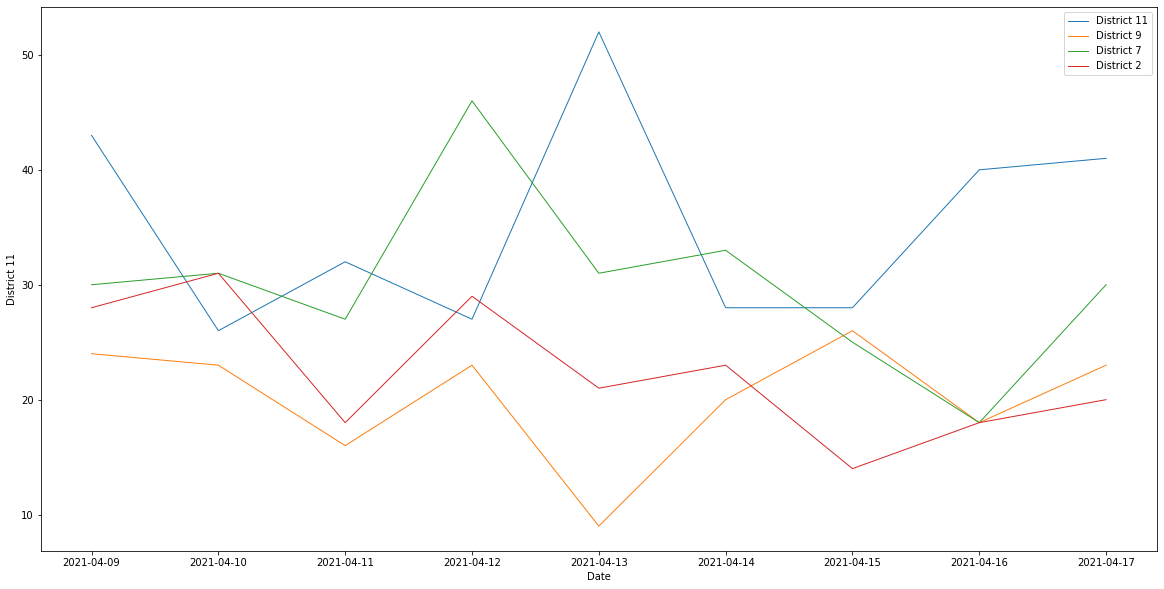

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
for district in districts_samples:
  district_string = f"District {district}"
  sns.lineplot(x = df_districts["Date"][-10:-1], y= df_districts[district_string][-10:-1], linewidth = 1, label = district_string ,ax = ax);

Text(0, 0.5, 'Crimenes')

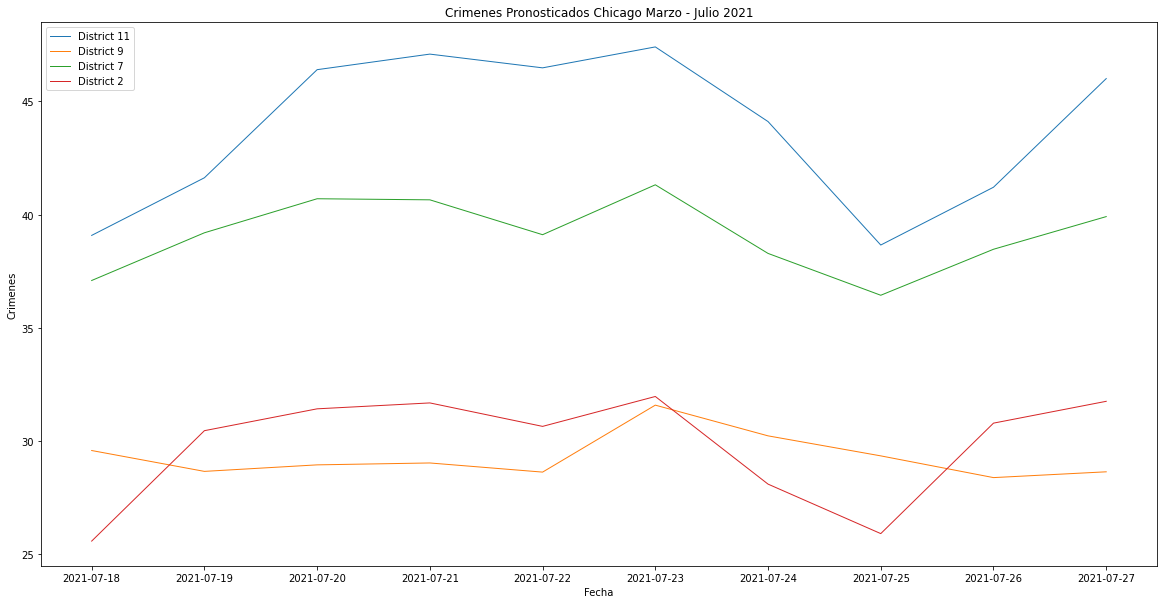

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
for district in districts_samples:
  district_string = f"District {district}"
  sns.lineplot(x = predictions_df["Date"][-10:], y= predictions_df[district_string][-10:], linewidth = 1, label = district_string ,ax = ax)
ax.set_title("Crimenes Pronosticados Chicago Marzo - Julio 2021")
ax.set_xlabel("Fecha")
ax.set_ylabel("Crimenes")

# Distritos policiales

## Mapa cloroplético y estaciones de policia

In [ ]:
#Estaciones de policia por distrito 

estacion_policias = pd.read_json("https://data.cityofchicago.org/resource/gkur-vufi.json")
location = estacion_policias["location"].apply(pd.Series).astype(float)
estacion_policias_clean = pd.concat([estacion_policias["district"], location["latitude"], location["longitude"]], axis=1)

In [ ]:
distrito_conteo = pd.DataFrame()
distrito_conteo["conteo"] = df.groupby("District")["ID"].count()
distrito_conteo["District"] = ["001", "002", "003", "004", "005", "006", "007", "008", "009", "010", "011", "012", "014",
                               "015", "016", "017", "018", "019", "020", "022", "024", "025"]

In [ ]:
import folium

state_geo = f'https://opendata.arcgis.com/datasets/0b2f69d9383f477889302b7d654f224d_0.geojson'
state_data = distrito_conteo

m = folium.Map(location=[41.85, -87.7], zoom_start=10, width='40%', height='80%')

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['District', 'conteo'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    highlight=True,
    legend_name='Conteo de delitos'
).add_to(m)

folium.LayerControl().add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NAME'],labels=False)
)

for index, row in estacion_policias_clean.iterrows():
  estacion_distrito = "Distrito " + row["district"]
  folium.Marker([row["latitude"], row["longitude"]],  
                tooltip=estacion_distrito,
                icon=folium.Icon(color="blue", icon="university", prefix="fa"),).add_to(m)

m

## Clasificador KNN

In [ ]:
df.groupby("Primary Type")["ID"].count().sort_values()

Primary Type
NON-CRIMINAL (SUBJECT SPECIFIED)           9
RITUALISM                                 15
NON - CRIMINAL                            38
HUMAN TRAFFICKING                         67
OTHER NARCOTIC VIOLATION                 127
NON-CRIMINAL                             163
PUBLIC INDECENCY                         174
OBSCENITY                                673
CONCEALED CARRY LICENSE VIOLATION        715
CRIMINAL SEXUAL ASSAULT                 2630
STALKING                                3602
INTIMIDATION                            3922
KIDNAPPING                              5801
HOMICIDE                               10619
ARSON                                  10921
LIQUOR LAW VIOLATION                   12377
GAMBLING                               13383
INTERFERENCE WITH PUBLIC OFFICER       17027
SEX OFFENSE                            24004
CRIM SEXUAL ASSAULT                    24391
OFFENSE INVOLVING CHILDREN             45582
PUBLIC PEACE VIOLATION                 472

In [ ]:
df_knn = df
df_knn = df_knn[df_knn["Primary Type"] == "SEX OFFENSE"]

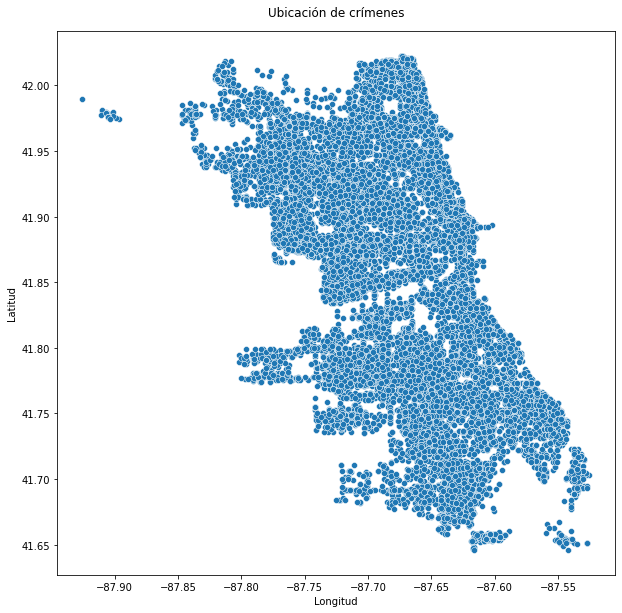

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

sns.scatterplot(df_knn['Longitude'], df_knn['Latitude'], ax=ax);

In [ ]:
coordenadas =  df_knn[["Longitude", "Latitude"]]
etiquetas = df_knn["District"]

### Resultados KNN

In [ ]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 

# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(coordenadas, etiquetas, test_size=0.40) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(classification_report(y_test, y_predict)) 

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       361
         2.0       0.99      0.98      0.99       390
         3.0       0.96      0.97      0.97       433
         4.0       0.98      0.98      0.98       462
         5.0       0.98      0.98      0.98       369
         6.0       0.97      0.97      0.97       460
         7.0       0.99      0.98      0.99       478
         8.0       0.99      1.00      1.00       739
         9.0       0.98      0.99      0.98       585
        10.0       0.97      0.98      0.97       438
        11.0       0.96      0.93      0.94       383
        12.0       0.95      0.95      0.95       500
        14.0       0.96      0.95      0.96       434
        15.0       0.97      0.96      0.97       280
        16.0       0.98      0.98      0.98       367
        17.0       0.98      0.97      0.98       430
        18.0       0.99      0.99      0.99       364
        19.0       0.97    

In [ ]:
#Introducir coordenadas
mipos_lon = -87.620755	
mipos_lat = 41.886995

In [ ]:
Xnew = scaler.transform([[mipos_lon, mipos_lat]])
ynew = classifier.predict(Xnew)
distrito = str(int(ynew[0]))
coor_pol = estacion_policias_clean[estacion_policias_clean["district"] == distrito]
poli_lon = coor_pol["longitude"].values[0]
poli_lat = coor_pol["latitude"].values[0]

### Geocoding

In [ ]:
import requests
from requests.structures import CaseInsensitiveDict

url = "http://open.mapquestapi.com/directions/v2/routematrix?key=ne7nKKIyw84BcHsSu3b6AKsQZ8LE82kx"

headers = CaseInsensitiveDict()
headers["Content-Type"] = "application/json"

data = """
{
  "locations": [
    '"""+str(poli_lat)+", "+str(poli_lon)+"""',
    '"""+str(mipos_lat)+", "+str(mipos_lon)+"""',
  ],
  "options": {
    "OneToMany": true,
    "doReverseGeocode": false,
    "unit": k
  }
}
"""


resp = requests.post(url, headers=headers, data=data)

print(resp.text)
peticion = resp.text

{"allToAll":false,"distance":[0,4.115],"locations":[{"dragPoint":false,"displayLatLng":{"lng":-87.627356,"lat":41.858373},"adminArea4":"","adminArea5":"","postalCode":"","adminArea1":"","adminArea3":"","type":"s","sideOfStreet":"N","geocodeQualityCode":"XXXXX","adminArea4Type":"County","linkId":0,"street":"","adminArea5Type":"City","geocodeQuality":"LATLNG","adminArea1Type":"Country","adminArea3Type":"State","latLng":{"lng":-87.627356,"lat":41.858373}},{"dragPoint":false,"displayLatLng":{"lng":-87.620755,"lat":41.886995},"adminArea4":"","adminArea5":"","postalCode":"","adminArea1":"","adminArea3":"","type":"s","sideOfStreet":"N","geocodeQualityCode":"XXXXX","adminArea4Type":"County","linkId":0,"street":"","adminArea5Type":"City","geocodeQuality":"LATLNG","adminArea1Type":"Country","adminArea3Type":"State","latLng":{"lng":-87.620755,"lat":41.886995}}],"time":[0,314],"manyToOne":false,"info":{"statuscode":0,"copyright":{"imageAltText":"© 2021 MapQuest, Inc.","imageUrl":"http://api.mqcdn.

In [ ]:
import json

a_json = json.loads(peticion)

dataframe = pd.DataFrame.from_dict(a_json, orient="index")

tiempo = round(dataframe.T["time"][0][1]/60,1)
distancia = dataframe.T["distance"][0][1]*1000

### Lejania entre tú y la estación de policia recomendada

In [ ]:
import folium

state_geo = f'https://opendata.arcgis.com/datasets/0b2f69d9383f477889302b7d654f224d_0.geojson'
state_data = distrito_conteo

m = folium.Map(location=[poli_lat, poli_lon], zoom_start=12, width='40%', height='80%')

folium.LayerControl().add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NAME'],labels=False)
)
mi_pos = "Tu posición"
estacion_recomendada = "Estación de policia recomendada"
popup = "Distrito "+distrito


folium.Marker([mipos_lat, mipos_lon], tooltip=mi_pos, icon=folium.Icon(color="red", icon="male", prefix="fa"),).add_to(m)
folium.Marker([poli_lat, poli_lon], tooltip=estacion_recomendada, popup=popup, icon=folium.Icon(color="blue", icon="university", prefix="fa"),).add_to(m)

folium.Circle(
    radius=distancia,
    location=[poli_lat, poli_lon],
    color='blue',
    fill=True,
    fill_color='#3186cc'
).add_to(m)

folium.Marker(location=[poli_lat+0.022, poli_lon+0.015], 
              icon=folium.DivIcon(
                  icon_size=(180, 20),
                  html = f'''<div style="
                             text-align: center;
                             font-size: 12pt;
                             border-radius: 20px;
                             font-family: serif;
                             color: black;
                             background-color: white;">
                             <p>Tiempo: {tiempo} min.</p>\
                             <p>Distancia: {distancia} m.</p>\
''')).add_to(m)

m